# Задача классификации.
Датасет: https://www.kaggle.com/datasets/ahmettezcantekin/beginner-datasets, файл income.csv

## Постановка задачи
В данном датасете находятся примерно 32,5 тысячи профилей людей.
На основе этих данных решим задачу классификации - имеет ли человек доход более 50 тысяч долларов в год.

## 0. Подключение библиотек и чтение датасета

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("income.csv")

In [3]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


### Признаки:

1) `age` - возраст
2) `workclass` - типа занятости по принадлежности к государственным или частным компаниям
3) `education` - уровень образования
4) `education-num` - уровень образования (числовой вид)
5) `marital-status` - семейное положение (холост/не жената, в браке, разведен(а))
6) `occupation` - описание компании, опубликовавшей вакансию
7) `relationship` - семейное положение (в том числе, есть ли ребенок вне брака)
8) `race` - раса
9) `sex` - пол
10) `capital_gain` - был ли доход с продажи имущества и если да, то сколько
11) `capital_loss` - было ли продано имущество с убытком
12) `hours_per_week` - сколько часов в неделю человек работает
13) `nativa-country` - страна рождения
14) `income` - имеет ли человек доход более 50 тысяч долларов

## 1. Визуализация данных

In [4]:
df.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income >50K        int64
dtype: object

In [5]:
df.describe(include = 'all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
count,32561.000000,30725,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561.000000
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,NaN
mean,38.581647,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


Мы видим следующее:
* Средний возраст: примерно 38,5 лет
* Наиболее частый тип занятости: частная компания
* Наиболее частое семейное положение: в браке
* Наиболее частая раса: белый
* Наиболее частый пол: мужской
* В основном никто не имеет дохода/убытка от продажи имущества
* В среднем люди работают 40 часов в неделю
* Чаще всего родная страна - США
* Менее 25% имеют доход выше 50 тысяч

Удалим из таблицы столбец education-num, поскольку он повторяет education

In [6]:
df = df.drop('education-num', axis=1)

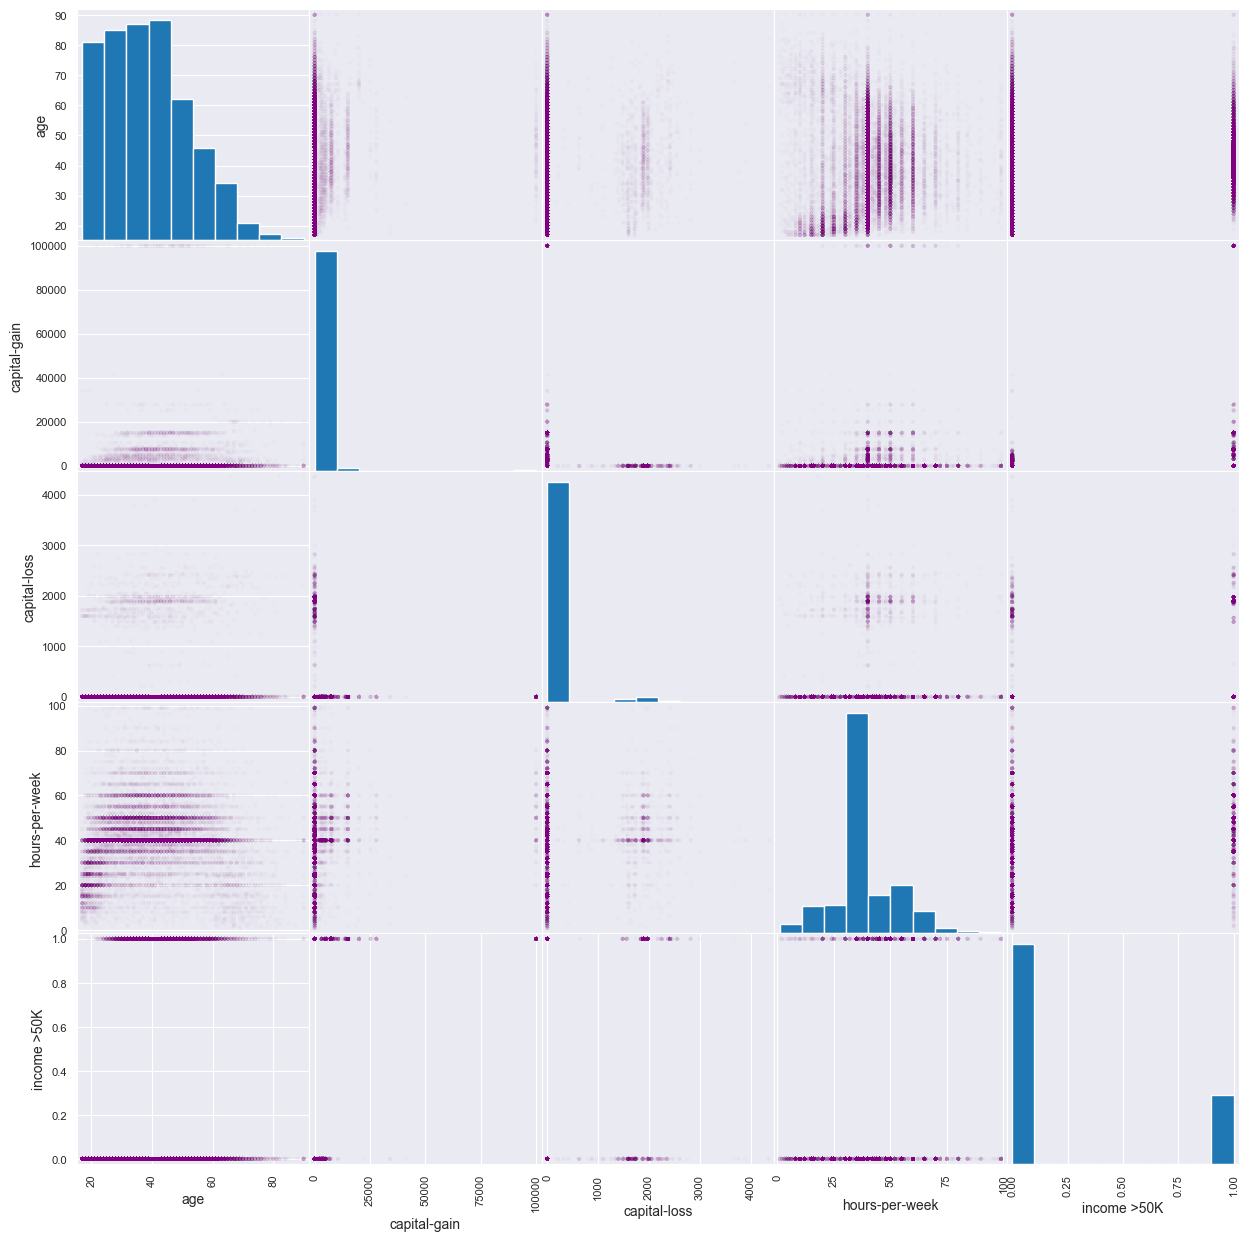

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = .01, figsize = (15, 15), color='purple')
pass

In [8]:
numeric_columns = [column for column in df.columns if df[column].dtype.name != 'object']
corr_mat = df[numeric_columns].corr()
corr_mat

,age,capital-gain,capital-loss,hours-per-week,income >50K
age,1.000000,0.077674,0.057775,0.068756,0.234037
capital-gain,0.077674,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,0.078409,0.054256,1.000000,0.229689
income >50K,0.234037,0.223329,0.150526,0.229689,1.000000


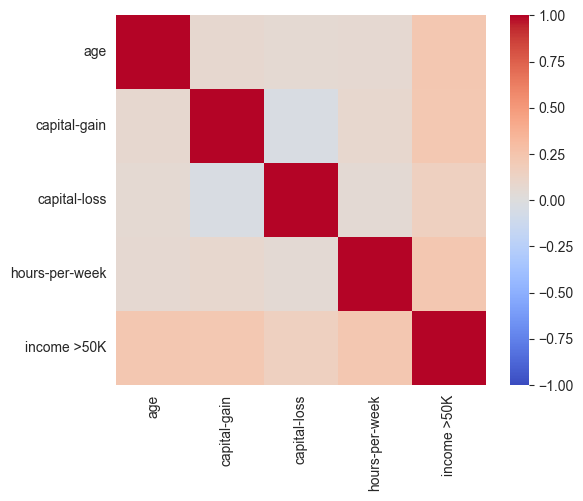

In [9]:
sns.heatmap(corr_mat, vmin=-1.0, vmax=1.0, square=True, cmap='coolwarm')
pass

In [10]:
corr_mat < -0.5

,age,capital-gain,capital-loss,hours-per-week,income >50K
age,False,False,False,False,False
capital-gain,False,False,False,False,False
capital-loss,False,False,False,False,False
hours-per-week,False,False,False,False,False
income >50K,False,False,False,False,False


Ни позитивной, ни негативной корреляции между признаками не обнаружено

## 2. Пропущенные значения

In [11]:
df.isna().sum()

age                  0
workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64

Выкинем из таблицы пропущенные значения

In [12]:
data = df.dropna(axis = 0)
data.isna().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income >50K       0
dtype: int64

## 3. Обработка категориальных признаков

Закодируем категориальные признаки при помощи LabelEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
category_columns = [column for column in data.columns if data[column].dtype.name == 'object']
for column in category_columns:
    data[column] = le.fit_transform(data[column])
data

C:\Users\Diana\AppData\Local\Temp\ipykernel_15100\1874177341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])


,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,5,9,4,0,1,4,1,2174,0,40,38,0
1,50,4,9,2,3,0,4,1,0,0,13,38,0
2,38,2,11,0,5,1,4,1,0,0,40,38,0
3,53,2,1,2,5,0,2,1,0,0,40,38,0
4,28,2,9,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,7,2,12,5,4,0,0,0,38,38,0
32557,40,2,11,2,6,0,4,1,0,0,40,38,1
32558,58,2,11,6,0,4,4,0,0,0,40,38,0
32559,22,2,11,4,0,3,4,1,0,0,20,38,0


## 4. Нормировка

Приведем все числовые признаки к диапазону [0;1]

In [14]:
data = (data - data.min(axis = 0))/(data.max(axis = 0) - data.min(axis = 0))
data.describe()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,0.293670,0.366554,0.688918,0.430022,0.458450,0.283668,0.919651,0.675685,0.010920,0.020288,0.407462,0.909564,0.248922
std,0.179927,0.158987,0.254153,0.249669,0.309967,0.320268,0.208677,0.468126,0.074064,0.092814,0.122245,0.152634,0.432396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.333333,0.600000,0.333333,0.153846,0.000000,1.000000,0.000000,0.000000,0.000000,0.397959,0.950000,0.000000
50%,0.273973,0.333333,0.733333,0.333333,0.461538,0.200000,1.000000,1.000000,0.000000,0.000000,0.397959,0.950000,0.000000
75%,0.410959,0.333333,0.800000,0.666667,0.692308,0.600000,1.000000,1.000000,0.000000,0.000000,0.448980,0.950000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Обучение модели

Разделим датасет на обучающую и тестовую выборки (в соотношении 3:1)

In [15]:
x = data.drop(['income >50K'], axis=1)
y = data['income >50K']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.25)

### Метод kNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[5095  878]
 [ 544 1024]]


C:\Users\Diana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


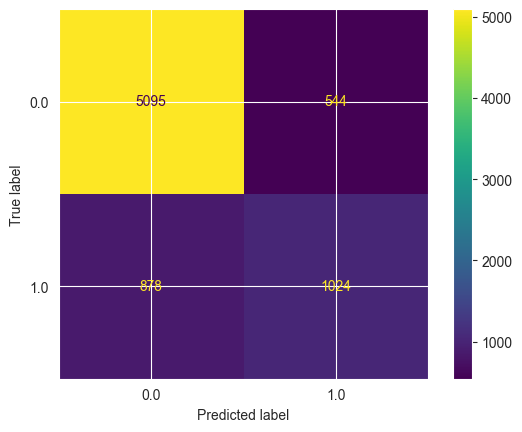

In [18]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test, y_test)

Точность классификатора:

In [19]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Train: ", train_acc)
print("Test: ",  test_acc)

Train:  0.8710932319526105
Test:  0.8114308447155549


Попробуем другие значения классификатора

C:\Users\Diana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


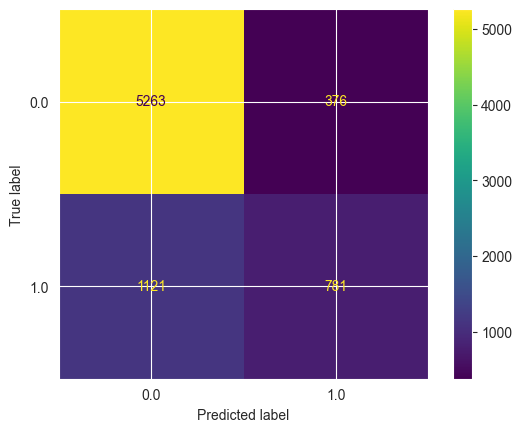

In [20]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

plot_confusion_matrix(knn, x_test, y_test)

In [21]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Train: ", train_acc)
print("Test: ",  test_acc)

Train:  0.8709164051102958
Test:  0.8014852141625779


C:\Users\Diana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


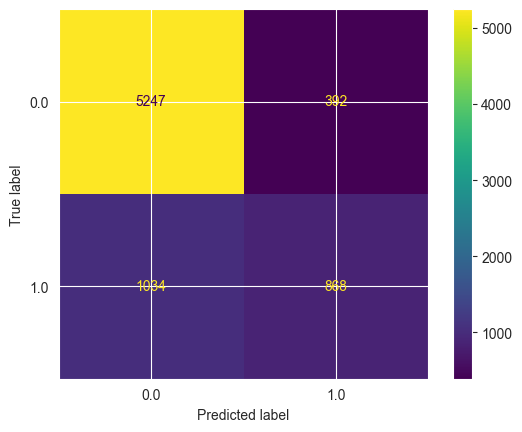

In [22]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

plot_confusion_matrix(knn, x_test, y_test)

In [23]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Train: ", train_acc)
print("Test: ",  test_acc)

Train:  0.8603067945714159
Test:  0.8109004110860628


Наибольшая точность получилась при k=5

### Метод градиентного бустинга

In [24]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(x_train, y_train)

train_acc = accuracy_score(y_train, gbt.predict(x_train))
test_acc = accuracy_score(y_test, gbt.predict(x_test))
print("Train: ", train_acc)
print("Test: ",  test_acc)

Train:  0.8918703859245833
Test:  0.8634133404057818


Точность на тесте у gbt выше точности knn на 5%

### 6. Нейронные сети - MLP. Подбор гиперпараметров

Используем в качестве солвера возьмем Adam
В качестве функции активации - ReLu
Один скрытый слой, количество нейронов - 100

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,),
                          solver='adam',
                          activation='relu',
                          random_state=94,
                          max_iter=1000)

In [27]:
%%time
mlp_model.fit(x_train, y_train)

CPU times: total: 13.7 s
Wall time: 13.5 s


MLPClassifier(max_iter=1000, random_state=94)

In [28]:
y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)

Ошибки на обучающей и тестовой выборке

In [29]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.1678528800671942, 0.1791539583609601)

In [30]:
print(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

0.8321471199328058 0.82084604163904


In [31]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha,
                              hidden_layer_sizes=(100,),
                              solver='adam',
                              activation='relu',
                              random_state=94,
                              max_iter=1000)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

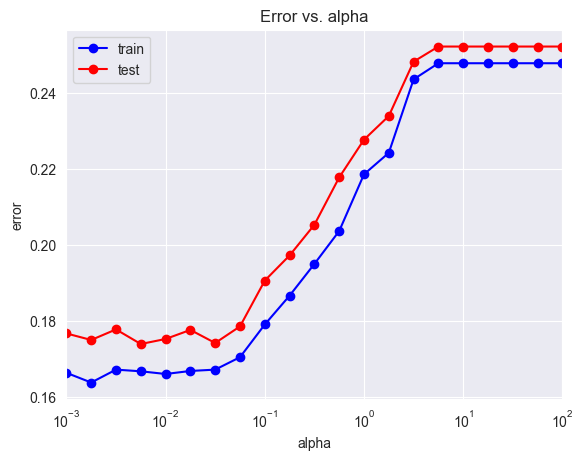

In [32]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

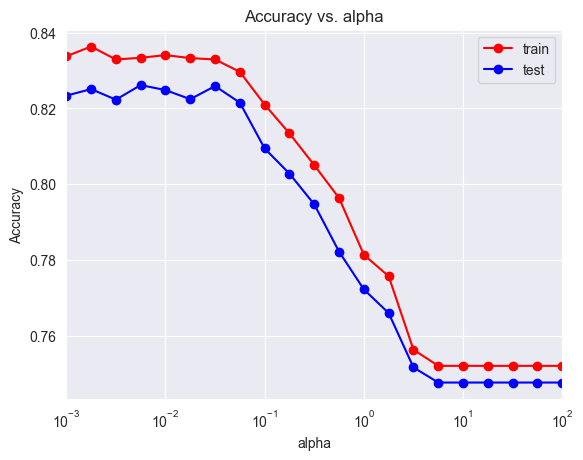

In [33]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки на обучающей и тестовой выборке

In [34]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.1636974492727996 0.173849622066039


Найдем оптимальное значение параметра регуляции:

In [35]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.00562341]


In [36]:
alpha_opt = alpha_opt[0]

## Классификатор с оптимальным значением параметра регуляции

In [37]:
mlp_model = MLPClassifier(alpha = alpha_opt,
                          hidden_layer_sizes=(100,),
                          solver='adam',
                          activation='relu',
                          random_state=94,
                          max_iter=1000)

mlp_model.fit(x_train, y_train)
y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.16665929888157022, 0.173849622066039)

Подбор оптимального числа нейронов:

In [38]:
neuron_arr = np.linspace(10, 500, 10).astype(int)
test_error = []
train_error = []
test_acc = []
train_acc = []

for count in neuron_arr:
  mlp_model = MLPClassifier(alpha=alpha_opt,
                            hidden_layer_sizes=(count,),
                            solver='adam',
                            activation='relu',
                            max_iter=1000,
                            random_state=94)
  mlp_model.fit(x_train, y_train)

  y_train_pred = mlp_model.predict(x_train)
  y_test_pred = mlp_model.predict(x_test)

  test_error.append(np.mean(y_test != y_test_pred))
  train_error.append(np.mean(y_train != y_train_pred))
  test_acc.append(accuracy_score(y_test, y_test_pred))
  train_acc.append(accuracy_score(y_train, y_train_pred))

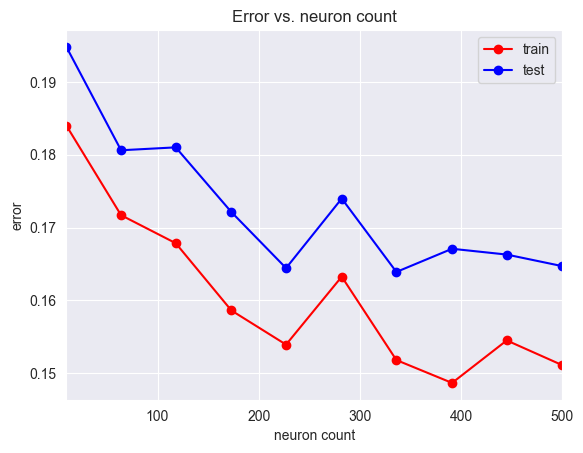

In [52]:
plt.plot(neuron_arr, train_error, 'r-o', label='train')
plt.plot(neuron_arr, test_error, 'b-o', label='test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Error vs. neuron count')
plt.xlabel('neuron count')
plt.ylabel('error')
plt.legend()

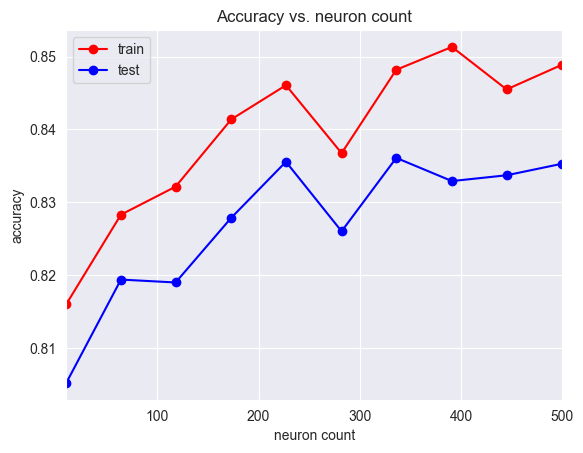

In [53]:
plt.plot(neuron_arr, train_acc, 'r-o', label='train')
plt.plot(neuron_arr, test_acc, 'b-o', label='test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Accuracy vs. neuron count')
plt.xlabel('neuron count')
plt.ylabel('accuracy')
plt.legend()

Ошибки на обучающей и тестовой выборке

In [41]:
min_train_error = np.min(train_error)
min_test_error = np.min(test_error)
print(min_train_error, min_test_error)

0.14866716767605323 0.16390399151306193


Оптимальное число нейронов

In [45]:
neuron_opt = neuron_arr[test_error == min_test_error]
print(neuron_opt)

[336]


## Классификатор при оптимальном значении параметра регуляризации и числа нейронов


In [46]:
neuron_opt = neuron_opt[0]
mlp_model = MLPClassifier(alpha = alpha_opt,
                          hidden_layer_sizes = (neuron_opt,),
                          solver='adam',
                          activation='relu',
                          max_iter=1000,
                          random_state = 94)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.1518058441271385
0.16390399151306193


In [47]:
accuracy_score(y_train, y_train_pred)

0.8481941558728615

In [48]:
accuracy_score(y_test, y_test_pred)

0.8360960084869381

Мы видим, что точность модели ниже на 3%, чем у модели, полученной при помощи градиентного бустинга, но выше на 2%, чем у модели, полученной при помощи kNN

## Матрица рассогласования:

In [49]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[5226  823]
 [ 413 1079]]


C:\Users\Diana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


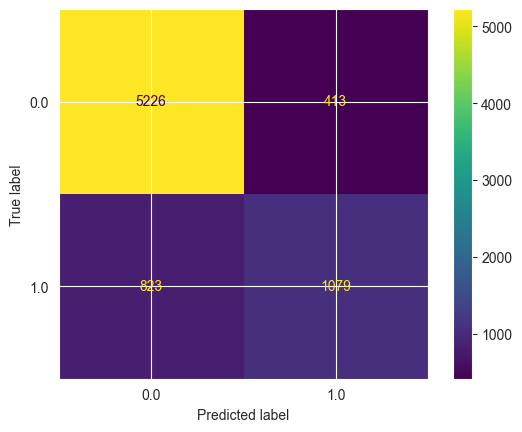

In [56]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model, x_test, y_test)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      5639
         1.0       0.72      0.57      0.64      1902

    accuracy                           0.84      7541
   macro avg       0.79      0.75      0.77      7541
weighted avg       0.83      0.84      0.83      7541



# Выводы

Использование нейронной сети не дало однозначного выигрыша по точности классификации, метод градиентного бустинга справился лучше
Оптимальный результат был достигнут при alpha = 0,00562341, числе нейронов = 336
С ростом коэффициента регуляции растет ошибка, а значит у модели нет переобучения